## Table of Content: <a class="anchor" id="table-of-content"></a>
* [1. Problem Background and Motivation](#problem-background)
* [2. Import Packages](#import-package)
* [3. Data Preparation](#data-preparation)
* [4. Machine Learning Model](#ml-model)
* [5. Conclusion](#model-conclusion)

# 1. Problem Background & Motivation  <a class="anchor" id="problem-background"></a>

## What is the problem?
In the growing hotel industry, hotel operators must master competitive agility to maintain profitability. Competitive agility means they need to be prepared for boosting growth, optimize cost and most important refresh the operating model by analyzing the way of working. 
When it comes to refreshing operating model, the hotel owners need to know what are the features the hotel needs to work upon to avoid cancellation and increase customer satisfaction. <br>
<img src ="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQe53huZG9YunYIyGu-BSc2Er1enQsDyWw9tw&usqp=CAU">



## Motivation

As a Data Scientist, my task is to develop a model that would predict the booking cancellation depending on set of feature variables. This will help the hotel to generate better forecasts, modify their operating model and also come up with good business strategies. 

* [Go to Top](#table-of-content)


# 2. Import Packages  <a class="anchor" id="import-package"></a>
> **Numpy** : NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays. <br> <br>
 **Pandas** : Pandas is a software library written for the Python programming language for data manipulation and analysis. <br> 
 
 ##### The graphic libraries
 
 >**Seaborn** : Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics. <br> <br>
 
 
 ##### The Machine Learning Libraries
 >**Sklearn** : Scikit-learn is a free software machine learning library for the Python programming language featuring various classification, regression and clustering algorithms.
 
 * [Go to Top](#table-of-content)

In [59]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.feature_selection import SelectFromModel, SelectPercentile
from sklearn.metrics import f1_score, confusion_matrix

from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold


# 3. Data Preparation <a class="anchor" id="data-preparation"></a>

In [60]:

#Once the libraries are imported, we need to load/read our real-life historical data on which the regression model is trained. 
#We do this with the help of our analytical library pandas. Pandas creates a 2-D data structure also known as dataframe for the purpose of easy understanding and viewing of our data
df = pd.read_csv("hotel_bookings.csv")
#pd.set_option('max_columns', None)
pd.options.display.max_columns
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2


In [61]:
# Step 1: Check for duplicate records in our data to avoid redundancy.

# remove duplicates
print('Number of records:', len(df))
df.drop_duplicates()
print('Number of records after dropping dupes:', len(df))

#Step 4
#Check for kpis of our data
df.info()
df.isnull().sum()

Number of records: 119390
Number of records after dropping dupes: 119390
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babie

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

<B>Notes</B>
* We notice that columns children, country, agent and company have some null values we need to get rid of. <br>


In [62]:
df.dropna(subset=['children'], how='all', inplace=True)   #dropping rows with null values in children column because its just 4 rows
df['country'].fillna('PRT',inplace=True)                  #Filling out all the null values with the max value 'PRT'

<AxesSubplot:xlabel='is_canceled'>

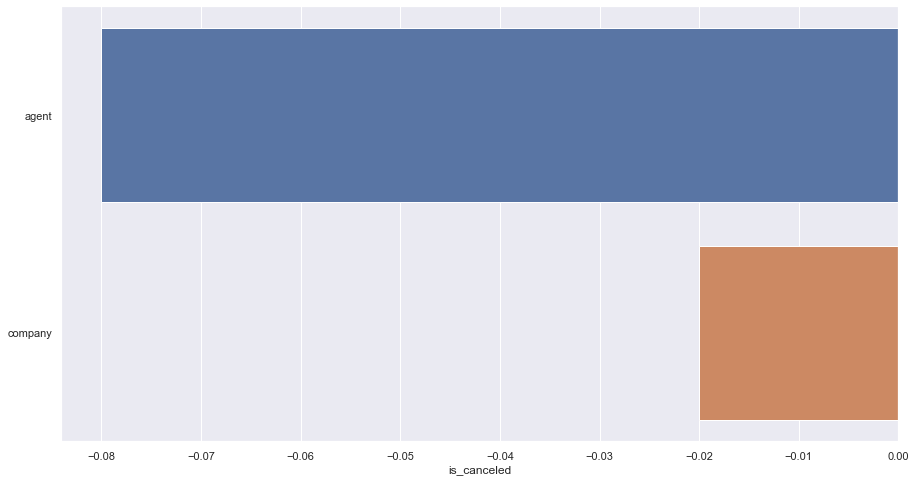

In [63]:
#Now, for agent and company lets first check whether do they have any relation with our target variable 'is_canceled'
numerical_vars = ['is_canceled','agent','company'] 
a = df[numerical_vars].corr()[['is_canceled']].round(2)
sns.set(rc= {'figure.figsize':(15,8)})
sns.barplot(x=a.is_canceled[1:],y=a.index[1:],data=a, orient='h')

<B>Note</B>
* Both agent and company have a negative relation and less that 0.2 which indicates they are not quite important features for our model. Hence, if we drop the null values it wont affect our model.

In [64]:
df.drop(['agent','company'],axis=1,inplace=True)
df.reset_index(drop=True,inplace=True)


In [65]:
#df.isnull().sum()   #To reensure we dont have any null values further

<B>

In [66]:
#Let us now check which feature variables are highly correlated with our target variable
corr= df.corr(method='pearson')['is_canceled'][:]
corr

is_canceled                       1.000000
lead_time                         0.293177
arrival_date_year                 0.016732
arrival_date_week_number          0.008132
arrival_date_day_of_month        -0.006084
stays_in_weekend_nights          -0.001783
stays_in_week_nights              0.024771
adults                            0.059990
children                          0.005048
babies                           -0.032488
is_repeated_guest                -0.084788
previous_cancellations            0.110140
previous_bookings_not_canceled   -0.057355
booking_changes                  -0.144371
days_in_waiting_list              0.054193
adr                               0.047622
required_car_parking_spaces      -0.195492
total_of_special_requests        -0.234706
Name: is_canceled, dtype: float64

<B>Note</B> <br>
Important features: <br>
1) Hotel : Type of hotel plays a big role in cancellation. Thus, I feel this feature is of importance for our model. <br>
2) Lead time : More the difference between booking date and check-in date more likely to get canceled <br>
3) Arrival date year : Year is important because sudden disease outbreak or any catastrophe can lead to major cancellations. <br>
4) Stays in weekend nights : Weekend night stays are used to undestand number of cancellations happening during weekend. If yes, what could be the reason? Weekend is always considered feasible time for holidays then why are there cancellations happening during this period? <br>
5) Stays in week nights : If there are cancellations during week nights despite being a holiday season, it is a matter of concern and a task for the hotel to inspect. <br>
6) Repeated guests : Repeated guests are less likely to cancel, thus if there is a pattern of cancellation in them it is important for the authorities to look into it. <br>
7) previous cancellations : Guests who have cancelled previously are likely to cancel bookings again. <br>
8) Previous bookings not canceled : A percentage of previous bookings not canceled can give a rough idea of how likely a customer is to cancel in  future. <br>
9) Day in waiting list : The more the number of days a customer is on waitlist is directly propotional to cancellation. <br>
10) total_of_special_requests, required_car_parking_spaces : Both have a high negative correlation with our target variable

Less important features : <br>
1) Children and babies : More the number of children and babies involved, cancellations are more likely. Maybe because of school or medical conditions. <br>
2) Country : The higher the economy, more will be the hotel prices. Budget friendly customers might switch to different hotels if they find more budget friendly hotels. <br>
3) Market_segment : Online bookings have more cancellation rates than offline <br>
4) Deposit_type : Non refundable deposits are less likely to be cancelled. <br>
5) Agent and company : It is important to keep a track on agents since authorities need to check where major cancellations are coming from and what is the reason? <br>
6) Booking changes : Above correlation displays a negative effect depicting more the number of changes less is the chance of cancellation. <br>

Not important features: <br>
1) Meal, arrival date week number, reserved_room_type, assigned_room_type, adults, Arrival date day of month <br>


In [67]:
#Next step is to check for any outliers present in our data
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000
mean,0.370395,104.014801,2016.156593,27.165003,15.798553,0.927605,2.500310,1.856390,0.103890,0.007949,0.031913,0.087121,0.137102,0.221131,2.321227,101.833541,0.062520,0.571340
std,0.482913,106.863286,0.707456,13.605334,8.780783,0.998618,1.908289,0.579261,0.398561,0.097438,0.175770,0.844350,1.497462,0.652315,17.595011,50.534664,0.245295,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.590000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


<B>Outlier Detection and Treatment</B>

<B>Note</B>
Columns below might have a possibility of having outliers, since the max value is more than 2 Standard deviation away from mean <br>
1) Lead Time <br>
2) previous_bookings_not_canceled <br>
3) days_in_waiting_list <br>
Thus, we now plot the above columns to check for outliers

C:\Users\dmmehta3\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


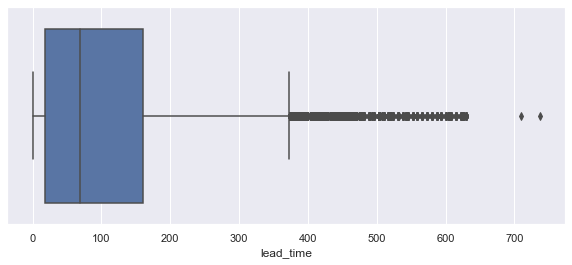

C:\Users\dmmehta3\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


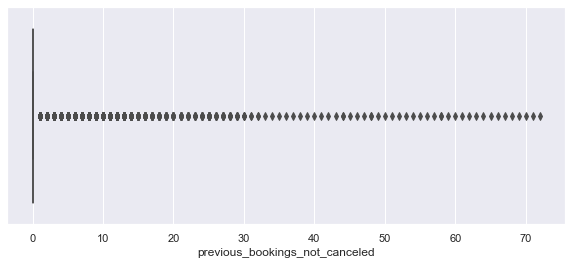

C:\Users\dmmehta3\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


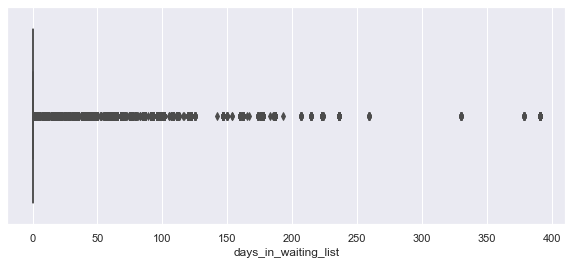

In [68]:
plt.figure(figsize=(10,4))
sns.boxplot(df['lead_time'])
plt.show()

plt.figure(figsize=(10,4))
sns.boxplot(df['previous_bookings_not_canceled'])
plt.show()
    
plt.figure(figsize=(10,4))
sns.boxplot(df['days_in_waiting_list'])
plt.show()






In [69]:
#We see that there are particular values in lead time which are beyond 650 and act as outliers. So we drop these values
df.drop(df[df['lead_time'] > 650].index, inplace = True )

#Similar is the case with days in waiting list which has some values greater than 300
df.drop(df[df['days_in_waiting_list'] > 300].index, inplace = True )
df.reset_index(drop=True,inplace=True)


C:\Users\dmmehta3\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


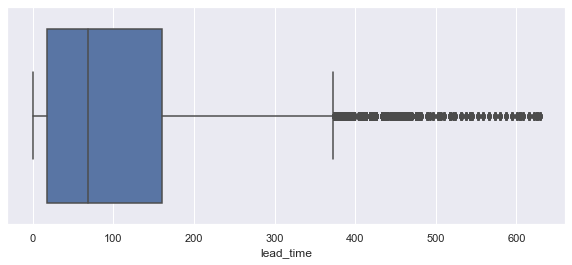

C:\Users\dmmehta3\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


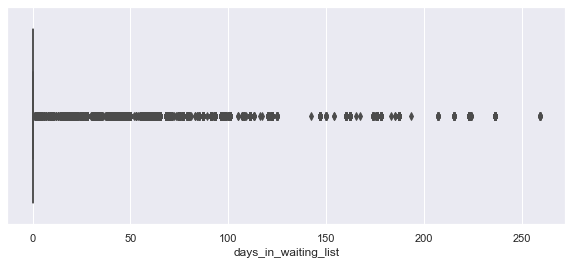

In [70]:
plt.figure(figsize=(10,4))
sns.boxplot(df['lead_time'])
plt.show()
plt.figure(figsize=(10,4))
sns.boxplot(df['days_in_waiting_list'])
plt.show()

<B>Visualization</B>

<AxesSubplot:xlabel='hotel', ylabel='count'>

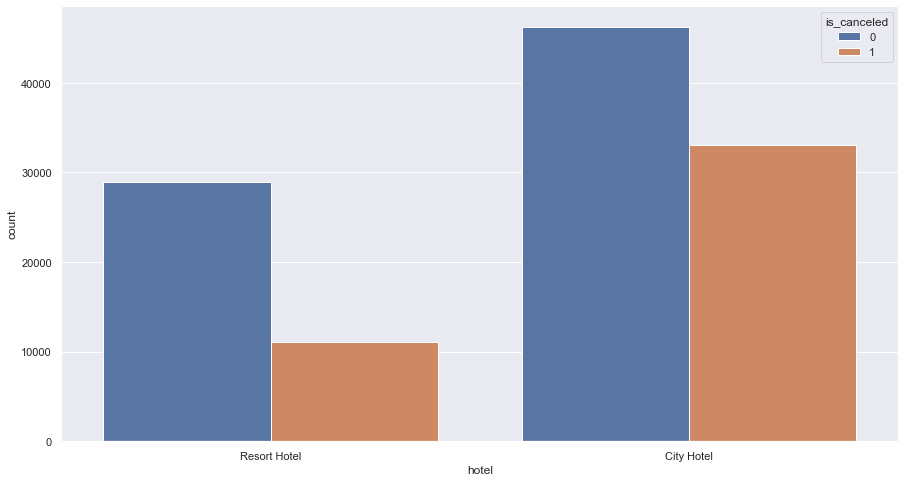

In [71]:
#1) Let us visualize hotel first, our assumption is City hotels have more cancellation rates.
sns.countplot(data=df, x='hotel', hue='is_canceled')

In [72]:
#Our assumption is correct

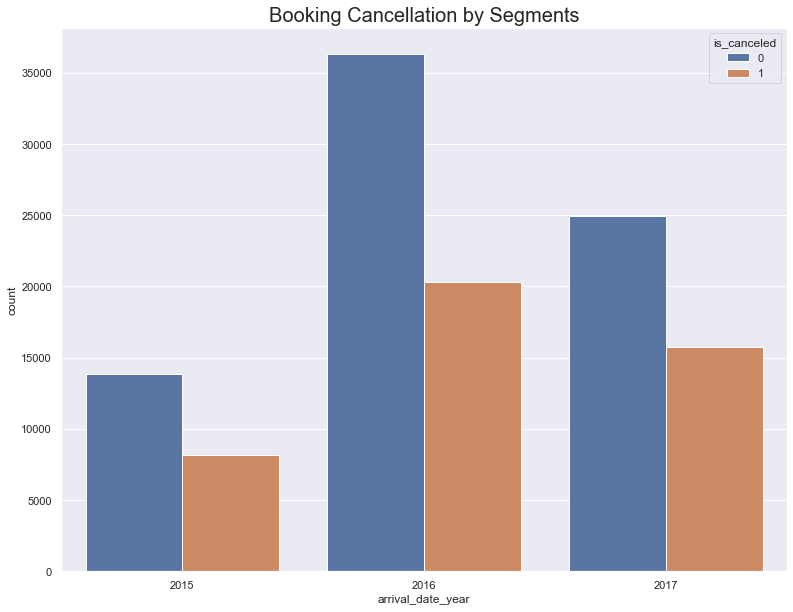

In [73]:
#2) Our next assumption is, to check cancellations by year since some situations like pandemic, natural disaster, manmade disasters can lead to cancellations
plt.figure(figsize = (13,10))
sns.set(style = "darkgrid")
plt.title("Booking Cancellation by Segments", fontdict = {'fontsize':20})
ax = sns.countplot(x = "arrival_date_year", hue = 'is_canceled', data = df)

<B>Year 2016 has major cancellations</B>

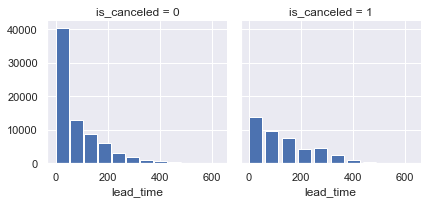

In [74]:
#Our assumption is the more the lead time the more is the cancellation rate
grid = sns.FacetGrid(df, col='is_canceled')
grid.map(plt.hist, 'lead_time', width=50)
grid.add_legend()

C:\Users\dmmehta3\Anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


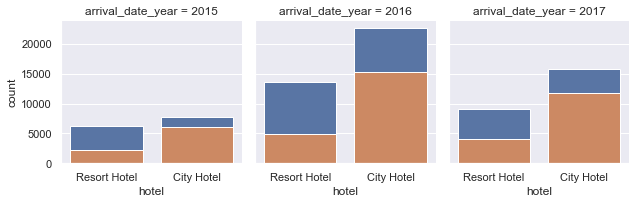

In [76]:
#Assumption To check which year, which hotel type has cancellation rate. 
grid = sns.FacetGrid(df, col='arrival_date_year', hue = 'is_canceled')
grid.map(sns.countplot, 'hotel')

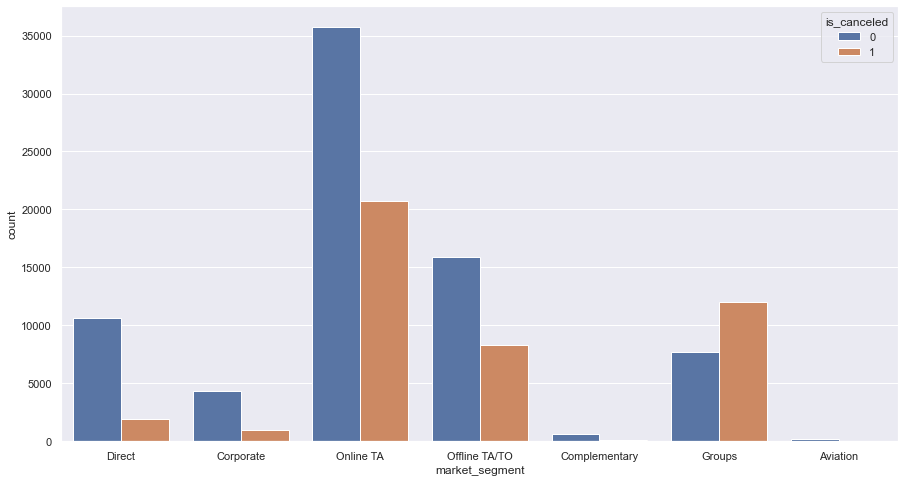

In [20]:
#Analyzing the market segment which has maximum cancellation
sns.countplot(x="market_segment", hue="is_canceled",data=df);

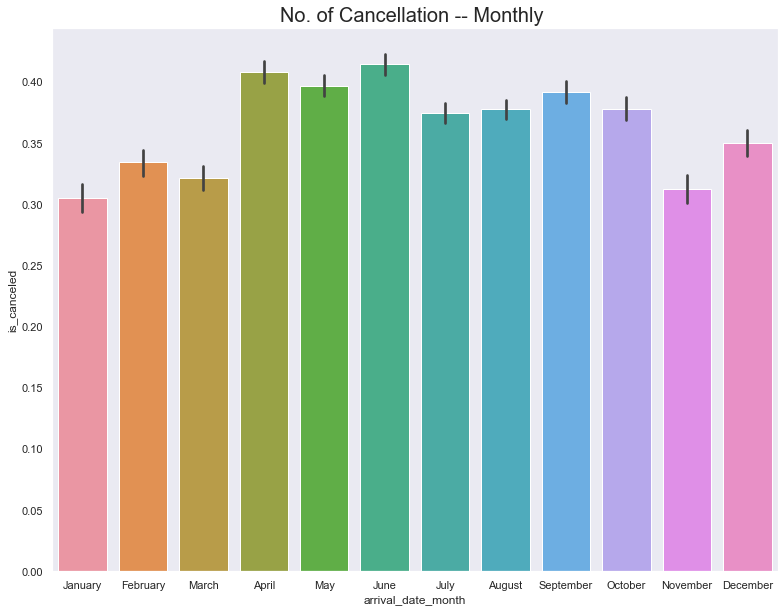

In [21]:
#Visualizing cancellation rates with respect to month
month_sorted = ['January','February','March','April','May','June','July','August','September','October','November','December']
plt.figure(figsize = (13,10))
sns.set(style="dark")
plt.title("No. of Cancellation -- Monthly ", fontdict={'fontsize': 20})
sns.barplot(x = 'arrival_date_month', y = 'is_canceled', data = df, order = month_sorted);

In [22]:
#Assumption: Previously canceled customers are more likely to cancel the bookings. Thus, this is an important feature which can be used in our model 
print(df.groupby(['previous_cancellations', 'is_canceled']).size())

previous_cancellations  is_canceled
0                       0              74602
                        1              38223
1                       0                337
                        1               5714
2                       0                 78
                        1                 38
3                       0                 45
                        1                 20
4                       0                 24
                        1                  7
5                       0                 17
                        1                  2
6                       0                 15
                        1                  7
11                      0                 25
                        1                 10
13                      0                  1
                        1                 11
14                      1                 14
19                      1                 19
21                      1                  1
24                 

### Handling categorical values

In [24]:

df.country.value_counts()

PRT    49018
GBR    12128
FRA    10395
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: country, Length: 177, dtype: int64

In [25]:
#Grouping the countries into 6 major categories depending on count
for i in range(len(df)):
    if df.loc[i, 'country'] == 'PRT':
        df.at[i, 'country'] = 'PRT'
    elif df.loc[i, 'country'] == 'GBR':
        df.at[i, 'country'] = 'GBR'
    elif df.loc[i, 'country'] == 'FRA':
        df.at[i, 'country'] = 'FRA'
    elif df.loc[i, 'country'] == 'ESP':
        df.at[i, 'country'] = 'ESP'
    elif df.loc[i, 'country'] == 'DEU':
        df.at[i, 'country'] = 'DEU'
    else :
        df.at[i, 'country'] = 'Other'

In [26]:
df.country.value_counts()

PRT      49018
Other    31913
GBR      12128
FRA      10395
ESP       8568
DEU       7287
Name: country, dtype: int64

In [27]:
lb = LabelEncoder()
var = ['hotel', 'customer_type', 'deposit_type', 'market_segment', 'country']
for item in var:
    df[item] = lb.fit_transform(df[item])
df = pd.get_dummies(df, columns=['hotel', 'customer_type', 'deposit_type',  'market_segment', 'distribution_channel', 'country'])

In [28]:

df.head()


,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,country_0,country_1,country_2,country_3,country_4,country_5
0,0,342,2015,July,27,1,0,0,2,0.0,...,1,0,0,0,0,0,0,0,0,1
1,0,7,2015,July,27,1,0,1,1,0.0,...,1,0,0,0,0,0,0,1,0,0
2,0,13,2015,July,27,1,0,1,1,0.0,...,0,0,0,0,0,0,0,1,0,0
3,0,14,2015,July,27,1,0,2,2,0.0,...,0,0,1,0,0,0,0,1,0,0
4,0,14,2015,July,27,1,0,2,2,0.0,...,0,0,1,0,0,0,0,1,0,0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119309 entries, 0 to 119308
Data columns (total 50 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   is_canceled                     119309 non-null  int64  
 1   lead_time                       119309 non-null  int64  
 2   arrival_date_year               119309 non-null  int64  
 3   arrival_date_month              119309 non-null  object 
 4   arrival_date_week_number        119309 non-null  int64  
 5   arrival_date_day_of_month       119309 non-null  int64  
 6   stays_in_weekend_nights         119309 non-null  int64  
 7   stays_in_week_nights            119309 non-null  int64  
 8   adults                          119309 non-null  int64  
 9   children                        119309 non-null  float64
 10  babies                          119309 non-null  int64  
 11  meal                            119309 non-null  object 
 12  is_repeated_gues

In [30]:
df.drop(['meal','arrival_date_month','reserved_room_type','assigned_room_type','arrival_date_week_number' ,'arrival_date_day_of_month', 'adults' ],axis=1,inplace=True)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119309 entries, 0 to 119308
Data columns (total 43 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   is_canceled                     119309 non-null  int64  
 1   lead_time                       119309 non-null  int64  
 2   arrival_date_year               119309 non-null  int64  
 3   stays_in_weekend_nights         119309 non-null  int64  
 4   stays_in_week_nights            119309 non-null  int64  
 5   adults                          119309 non-null  int64  
 6   children                        119309 non-null  float64
 7   babies                          119309 non-null  int64  
 8   is_repeated_guest               119309 non-null  int64  
 9   previous_cancellations          119309 non-null  int64  
 10  previous_bookings_not_canceled  119309 non-null  int64  
 11  booking_changes                 119309 non-null  int64  
 12  days_in_waiting_

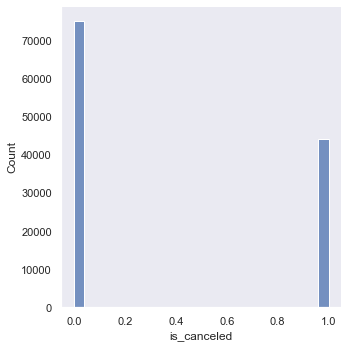

In [32]:
sns.displot(df['is_canceled'])

# Machine Learning  <a class="anchor" id="ml-model"></a>

In [33]:
train_var = df.drop(['is_canceled'], axis=1)
test_var = df['is_canceled']
X_train, X_test, y_train, y_test = train_test_split(train_var, test_var, test_size=0.20)

In [34]:
#We normalize data to transform features to be on a similar scale
std_scaler = StandardScaler()
std_scaler.fit(X_train)
X_train_std = std_scaler.transform(X_train)
X_test_std = std_scaler.transform(X_test)


### Logistic Regression

In [50]:
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train_std, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))




Best: 0.804921 using {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}


In [52]:
logreg=LogisticRegression(C=1,penalty="l2", solver = 'liblinear')
logreg.fit(X_train_std, y_train)
l_pred = logreg.predict(X_test_std)
print("Test accuracy: {:.3f}".format(logreg.score(X_test_std, y_test)))
print("F1 score: {:.3f}".format(f1_score(y_test, l_pred)))

Test accuracy: 0.809
F1 score: 0.709


### Decision Tree

In [53]:
tree = DecisionTreeClassifier(max_depth=1).fit(X_train_std, y_train)
scores = cross_val_score(tree, X_train_std, y_train, cv=5)
tree_pred = tree.predict(X_test_std)
print("Average cross validation score: {:.3f}".format(scores.mean()))
print("Test accuracy: {:.3f}".format(tree.score(X_test_std, y_test)))
print("F1 score: {:.3f}".format(f1_score(y_test, tree_pred)))
print(confusion_matrix(y_test, tree_pred))

Average cross validation score: 0.749
Test accuracy: 0.755
F1 score: 0.500
[[15089    13]
 [ 5839  2921]]


### KNN

In [44]:
knn = KNeighborsClassifier()
k_range = list(range(1, 6))
param_grid = dict(n_neighbors=k_range)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=2, random_state=1)
grid_search = GridSearchCV(knn, param_grid, cv=cv, scoring='accuracy', return_train_score=False,verbose=1)
grid_result = grid_search.fit(X_train_std, y_train)
print(grid_search.best_params_)
accuracy = grid_search.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )
training_accuracy = []
test_accuracy = []
neighbors_settings = range(3, 5)
for n_neighbors in neighbors_settings:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train_std, y_train)
    training_accuracy.append(knn.score(X_train_std, y_train))
    test_accuracy.append(knn.score(X_train_std, y_train))
    



Fitting 20 folds for each of 5 candidates, totalling 100 fits
{'n_neighbors': 4}
Accuracy for our training dataset with tuning is : 84.11%


In [46]:
knn = KNeighborsClassifier(n_neighbors=4).fit(X_train_std, y_train)
scores = cross_val_score(knn, X_train_std, y_train, cv=5)
knn_pred = knn.predict(X_test_std)
print("Average cross validation score: {:.3f}".format(scores.mean()))
print("Test accuracy: {:.3f}".format(knn.score(X_test_std, y_test)))
print("F1 score: {:.3f}".format(f1_score(y_test, knn_pred)))
print(confusion_matrix(y_test, knn_pred))

Average cross validation score: 0.840
Test accuracy: 0.844
F1 score: 0.766
[[14039  1063]
 [ 2659  6101]]


### Random Forest

In [54]:
def classifier(train, test, estimator, param_grid):
    grid_search = GridSearchCV(estimator, param_grid, cv=5)  #Method to find optimal parameter values from a given set of parameters in a grid
    grid_search.fit(train, y_train)
    print("Best parameters:", grid_search.best_params_)  #Printing best parameters from grid search result
    print("Best score:", grid_search.best_score_)
    print("Test score: {:.3f}".format(grid_search.score(test, y_test)))
    
    
#Next we move towards Feature selection. Features whose importance value is greater or equal are kept while the others are discarded. Threshold = median then the threshold value is the median of the feature importances
def feature_selection(model):
    select_features = SelectFromModel(estimator=model, threshold='median')
    select_features.fit(X_train_std, y_train)
    X_train_select = select_features.transform(X_train_std)
    X_test_select = select_features.transform(X_test_std)
    return X_train_select, X_test_select

def run_model(model, model_feature, param_grid):
    print("Before feature selection:")
    classifier(X_train_std, X_test_std, model, param_grid)
    X_train_select, X_test_select = feature_selection(model_feature)
    print("After feature selection")
    classifier(X_train_select, X_test_select, model, param_grid)

In [55]:
#Random Forest
param_grid = {'n_estimators':[50,75,100], 'max_depth':[1,2,5]}
run_model(RandomForestClassifier(), RandomForestClassifier(n_estimators=50, max_depth=2), param_grid)

Before feature selection:
Best parameters: {'max_depth': 5, 'n_estimators': 50}
Best score: 0.7697465548395743
Test score: 0.772
After feature selection
Best parameters: {'max_depth': 5, 'n_estimators': 50}
Best score: 0.7741469476838676
Test score: 0.779


### Neural Network

In [43]:
mlp = MLPClassifier(hidden_layer_sizes=[35, 20], alpha=0.001, solver='adam', activation='relu') #The ith element represents the number of neurons in the ith hidden layer, alpha is strength of L2 regularization, relu is the activation function for our hidden layer
mlp.fit(X_train_std, y_train)
mlp_pred = mlp.predict(X_test_std)
print("Train score: {:.3f}".format(mlp.score(X_train_std, y_train)))
print("Test accuracy: {:.3f}".format(mlp.score(X_test_std, y_test)))
print("F1 score: {:.3f}".format(f1_score(y_test, mlp_pred)))
print(confusion_matrix(y_test, mlp_pred))

Train score: 0.866
Test accuracy: 0.857
F1 score: 0.798
[[13715  1387]
 [ 2026  6734]]


C:\Users\dmmehta3\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


# Conclusion   <a class="anchor" id="model-conclusion"></a>


In our prediction, False positive and False Negatives both are of importance since:
If a booking is canceled and is predicted as not canceled, hotel might have ambiguity in estimating the number of available rooms and thereby other customers might be impacted because of being waitlisted. <br>
On the other hand if the booking is not canceled and is predicted as canceled the customers might be affected as well. <br>
Thus, we use F1 score to check which model predicts the best. <br>
From the F1 score results of each model, Neural Network is the winning model with a F1 score of 0.798. <br>

* [Go to Top](#table-of-content)
